In [1]:
from google.colab import drive
drive.mount('/content/drive')

FOLDERNAME = 'AI'
assert FOLDERNAME is not None, "[!] Enter the foldername."

import sys
sys.path.append('/content/drive/MyDrive/{}'.format(FOLDERNAME))

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import utils

In [3]:
raw_data = pd.read_csv("/content/drive/MyDrive/AI/wtbdata_245days.csv")
raw_data.head(5)

,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv
0,1,1,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,00:10,6.17,-3.99,30.73,41.80,25.92,1.0,1.0,1.0,-0.25,494.66
2,1,1,00:20,6.27,-2.18,30.60,41.63,20.91,1.0,1.0,1.0,-0.24,509.76
3,1,1,00:30,6.42,-0.73,30.52,41.52,20.91,1.0,1.0,1.0,-0.26,542.53
4,1,1,00:40,6.25,0.89,30.49,41.38,20.91,1.0,1.0,1.0,-0.23,509.36


In [4]:
top_turbines = utils.top_n_turbines(raw_data, 10)
top_turbines = utils.format_datetime(top_turbines, initial_date_str="01 05 2020")
turbine_ids = top_turbines["TurbID"].unique()
print(f'\nTurbines included in the dataset: {turbine_ids}')
top_turbines.head()

Original data has 4727520 rows from 134 turbines.

Sliced data has 352800 rows from 10 turbines.

Turbines included in the dataset: [ 1  3  4  5  6  9 10 11 12 70]


,Datetime,TurbID,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv
0,2020-05-01 00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-05-01 00:10:00,1,6.17,-3.99,30.73,41.80,25.92,1.0,1.0,1.0,-0.25,494.66
2,2020-05-01 00:20:00,1,6.27,-2.18,30.60,41.63,20.91,1.0,1.0,1.0,-0.24,509.76
3,2020-05-01 00:30:00,1,6.42,-0.73,30.52,41.52,20.91,1.0,1.0,1.0,-0.26,542.53
4,2020-05-01 00:40:00,1,6.25,0.89,30.49,41.38,20.91,1.0,1.0,1.0,-0.23,509.36


In [5]:
conditions = [
    np.isnan(top_turbines["Patv"]),
    (top_turbines["Pab1"] > 89) | (top_turbines["Pab2"] > 89) | (top_turbines["Pab3"] > 89),
    (top_turbines["Ndir"] < -720) | (top_turbines["Ndir"] > 720),
    (top_turbines["Wdir"] < -180) | (top_turbines["Wdir"] > 180),
    (top_turbines["Patv"] <= 0) & (top_turbines["Wspd"] > 2.5)
]

clean_data = utils.tag_abnormal_values(top_turbines, conditions)

clean_data.head()

,Datetime,TurbID,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv,Include
0,2020-05-01 00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,2020-05-01 00:10:00,1,6.17,-3.99,30.73,41.80,25.92,1.0,1.0,1.0,-0.25,494.66,True
2,2020-05-01 00:20:00,1,6.27,-2.18,30.60,41.63,20.91,1.0,1.0,1.0,-0.24,509.76,True
3,2020-05-01 00:30:00,1,6.42,-0.73,30.52,41.52,20.91,1.0,1.0,1.0,-0.26,542.53,True
4,2020-05-01 00:40:00,1,6.25,0.89,30.49,41.38,20.91,1.0,1.0,1.0,-0.23,509.36,True


In [6]:
all_features = list(clean_data.columns)

numerical_features = [f for f in all_features if f not in ["TurbID", "Datetime", "Include"]]

print(f"The numerical features are:\n\n{numerical_features}\n")

descriptive_stats = clean_data[numerical_features].describe()
descriptive_stats.apply(lambda s: s.apply('{0:.3f}'.format))

The numerical features are:

['Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir', 'Pab1', 'Pab2', 'Pab3', 'Prtv', 'Patv']



,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv
count,349365.000,349365.000,349365.000,349365.000,349365.000,349365.000,349365.000,349365.000,349365.000,349365.000
mean,5.312,0.760,23.156,29.260,190.814,23.666,23.694,23.689,-18.665,416.781
std,3.526,31.101,17.865,16.497,166.557,37.369,37.387,37.384,80.220,475.812
min,0.000,-233.650,-272.970,-272.970,-553.850,-0.990,-0.990,-0.990,-500.110,-8.250
25%,2.300,-3.510,15.170,21.600,55.280,0.010,0.010,0.010,-45.250,-0.300
50%,4.690,-0.140,26.380,31.330,202.340,0.990,0.990,0.990,-0.300,224.320
75%,7.590,3.310,32.870,38.490,320.950,39.240,39.700,39.590,-0.220,686.240
max,24.870,405.350,122.740,69.910,700.380,94.230,93.120,94.430,426.180,1551.170


In [7]:
bin_size=64
utils.histogram_plot(clean_data, numerical_features, bin_size)

interactive(children=(Dropdown(description='Turbine', options=(np.int64(1), np.int64(3), np.int64(4), np.int64…

In [8]:
utils.scatter_plot(clean_data, numerical_features)

interactive(children=(Dropdown(description='Turbine', options=(np.int64(1), np.int64(3), np.int64(4), np.int64…

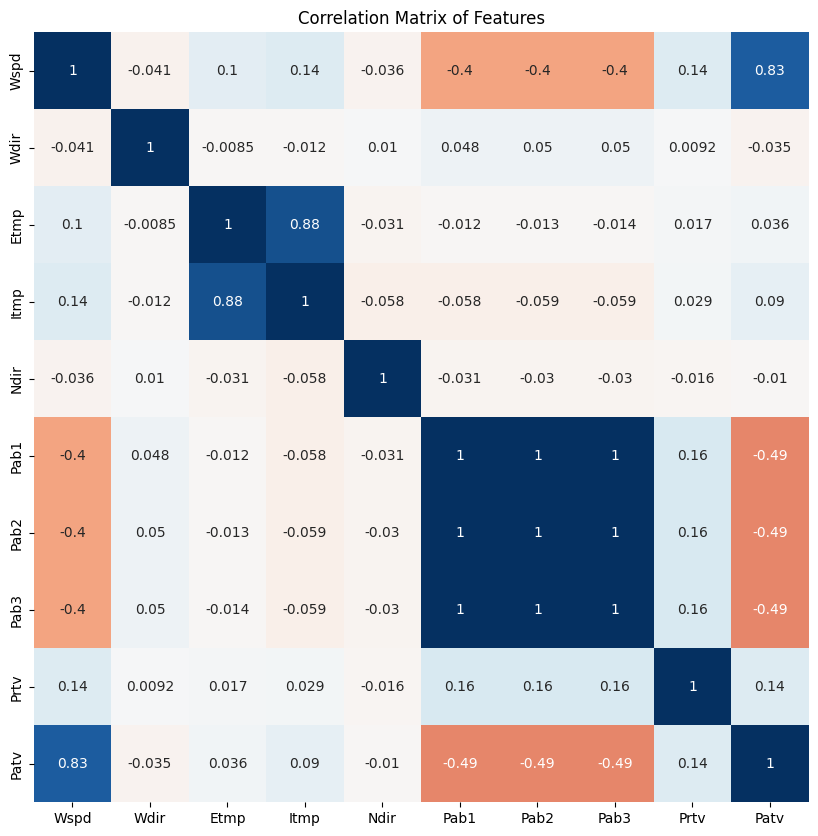

In [9]:
utils.correlation_matrix(clean_data[numerical_features])

In [10]:
clean_data  = utils.cut_pab_features(clean_data)
clean_data = utils.fix_temperatures(clean_data)
clean_data = utils.fix_active_powers(clean_data)

for feature in ["Wdir", "Ndir", "Pab"]:
    clean_data = utils.transform_angles(clean_data, feature)

clean_data.head(5)

,Datetime,TurbID,Wspd,Etmp,Itmp,Prtv,Patv,Include,WdirCos,WdirSin,NdirCos,NdirSin,PabCos,PabSin
0,2020-05-01 00:00:00,1,NaN,NaN,NaN,NaN,0.00,False,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-05-01 00:10:00,1,6.17,30.73,41.80,-0.25,494.66,True,0.997576,-0.069582,0.899405,0.437116,0.999848,0.017452
2,2020-05-01 00:20:00,1,6.27,30.60,41.63,-0.24,509.76,True,0.999276,-0.038039,0.934142,0.356901,0.999848,0.017452
3,2020-05-01 00:30:00,1,6.42,30.52,41.52,-0.26,542.53,True,0.999919,-0.012741,0.934142,0.356901,0.999848,0.017452
4,2020-05-01 00:40:00,1,6.25,30.49,41.38,-0.23,509.36,True,0.999879,0.015533,0.934142,0.356901,0.999848,0.017452


In [11]:
turb_id = 6
data = utils.prepare_data(clean_data, turb_id)

data.head(5)

,Wspd,Etmp,Itmp,Prtv,WdirCos,WdirSin,NdirCos,NdirSin,PabCos,PabSin,Patv
Datetime,,,,,,,,,,,
2020-05-01 00:50:00,6.37,30.77,37.90,-0.10,0.999397,-0.034725,0.530955,0.847400,1.000000,0.000524,501.54
2020-05-01 01:50:00,6.92,30.04,37.13,-0.06,0.989751,-0.142802,0.530955,0.847400,1.000000,0.000349,502.57
2020-05-01 02:50:00,7.16,29.98,36.89,-0.13,0.983064,-0.183265,0.701904,0.712271,0.999693,0.024781,513.08
2020-05-01 03:50:00,7.44,30.00,36.62,-0.09,0.996285,-0.086112,0.819152,0.573576,0.999479,0.032283,629.92
2020-05-01 04:50:00,9.58,30.24,35.71,-0.14,0.999693,-0.024781,0.839146,0.543907,0.982935,0.183951,458.30


In [12]:
data_with_wspd_forecasts = utils.add_wind_speed_forecasts(data)

features = list(data_with_wspd_forecasts.columns)

window, model, data_splits, history = utils.train_conv_lstm_model(data_with_wspd_forecasts, features, days_in_past=7)

utils.prediction_plot(window.plot_long, model, data_splits)

Epoch 1/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 0.6542 - val_loss: 0.3658
Epoch 2/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.3471 - val_loss: 0.4031
Epoch 3/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.2863 - val_loss: 0.3458
Epoch 4/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2356 - val_loss: 0.3208
Epoch 5/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.2076 - val_loss: 0.3051
Epoch 6/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1843 - val_loss: 0.3029
Epoch 7/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.1746 - val_loss: 0.2718
Epoch 8/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.1654 - val_loss: 0.2647
Epoch 9/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1562 - val_loss: 0.2824
Epoch 10/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1470 - val_loss: 0.2846
Epoch 11/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1392 - val_loss: 0.3000
Epoch 12/20
123/123 ━━━━━━━━━━━━━━━━━━━━

interactive(children=(IntSlider(value=24, continuous_update=False, description='Hours into future', layout=Lay…